In [3]:
import os
import cv2 as cv
from IPython.display import clear_output, Image, display, HTML

In [2]:
# Constants
VIDEO_FOLDER = 'Data/CCTV-2'
IMAGE_FOLDER = 'Data/cctv-images/images'
MODEL_FOLDER = 'Models'

# Initial exploration
This notebook contains some initial exploration of the images and videos we have available, and how we're going to detect people on those images/videos.

In [3]:
print(f"We have {len(os.listdir(VIDEO_FOLDER))} videos in {VIDEO_FOLDER}")
print(f"We have {len(os.listdir(IMAGE_FOLDER))} images in {IMAGE_FOLDER}")

We have 18 videos in Data/CCTV-2
We have 126 images in Data/cctv-images/images


# Object detection on Images
Sources:
General:
- [The basics of object detection: YOLO, SSD, R-CNN](https://towardsdatascience.com/the-basics-of-object-detection-yolo-ssd-r-cnn-6def60f51c0b)
- [Object Recognition using Python](https://www.javatpoint.com/object-recognition-using-python#:~:text=This%20technology%20is%20capable%20of,systems%2C%20and%20a%20lot%20more.)
- [Computer vision model performance](https://viso.ai/computer-vision/model-performance/)

Yolo:
- [YOLOv7: The most power object detection algorithm](https://viso.ai/deep-learning/yolov7-guide/#:~:text=YOLOv7%20is%20the%20latest%20official,authors%20of%20the%20YOLO%20architecture.)
- [Hugging Face interactive yolo demo](https://huggingface.co/spaces/akhaliq/yolov7)

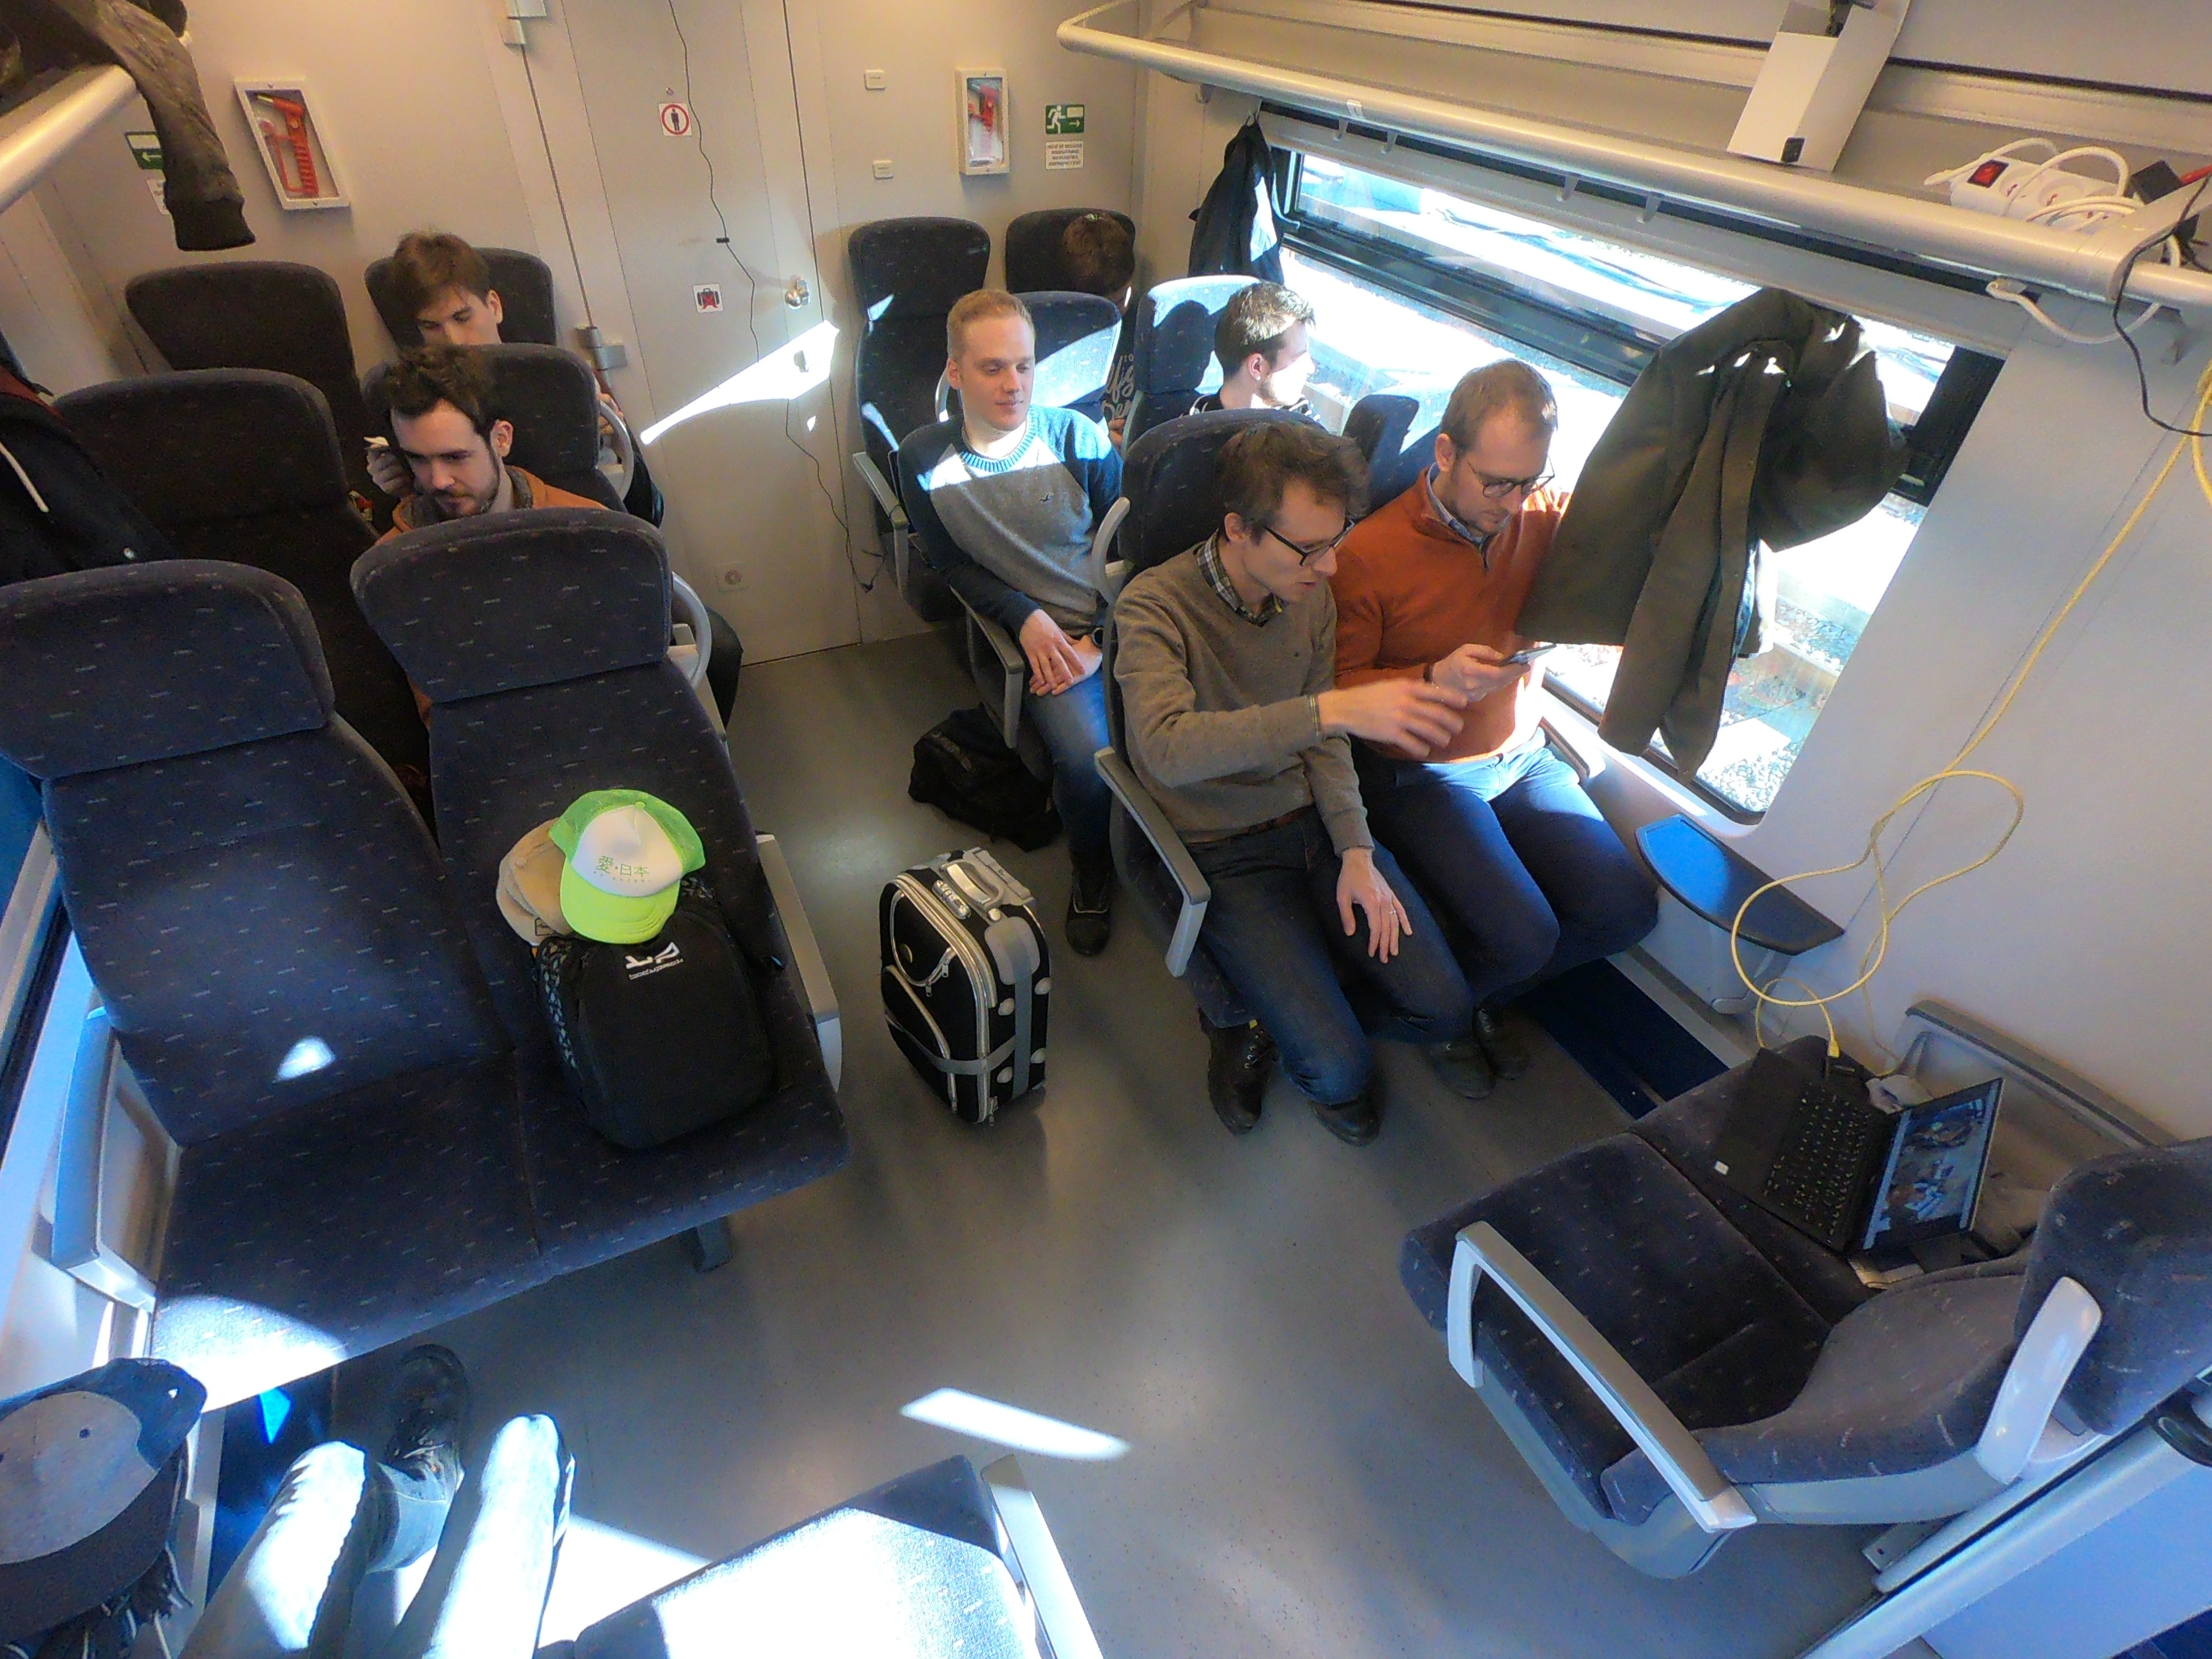

In [11]:
test_image = os.path.join(IMAGE_FOLDER, os.listdir(IMAGE_FOLDER)[94])
assert os.path.exists(test_image)

display_handle = display(None, display_id=True)
img = cv.imread(test_image, cv.IMREAD_ANYCOLOR)
_, img = cv.imencode('.jpeg', img)
display_handle.update(Image(data=img.tobytes()))

## YOLO
The first model we'll test out is YOLO (You Only Look Once). Recently, YOLOv7 has been released, and has been extremely popular amongst both researchers and companies because at the time of release (2022) it outperformed all other models. The version with the best performance (according to the original paper by Wang, Bochkovskiy, and Liao) is YOLOv7-e6e. 

The quickest way to test the model is to run the following command in the terminal:
```
python detect.py --source ..\..\cctv-images\images\GOPR0633.JPG --weights ..\weights\yolov7.pt
```
This generates the following image:

Data/Models\yolov7\runs\detect\exp\GOPR0633.JPG


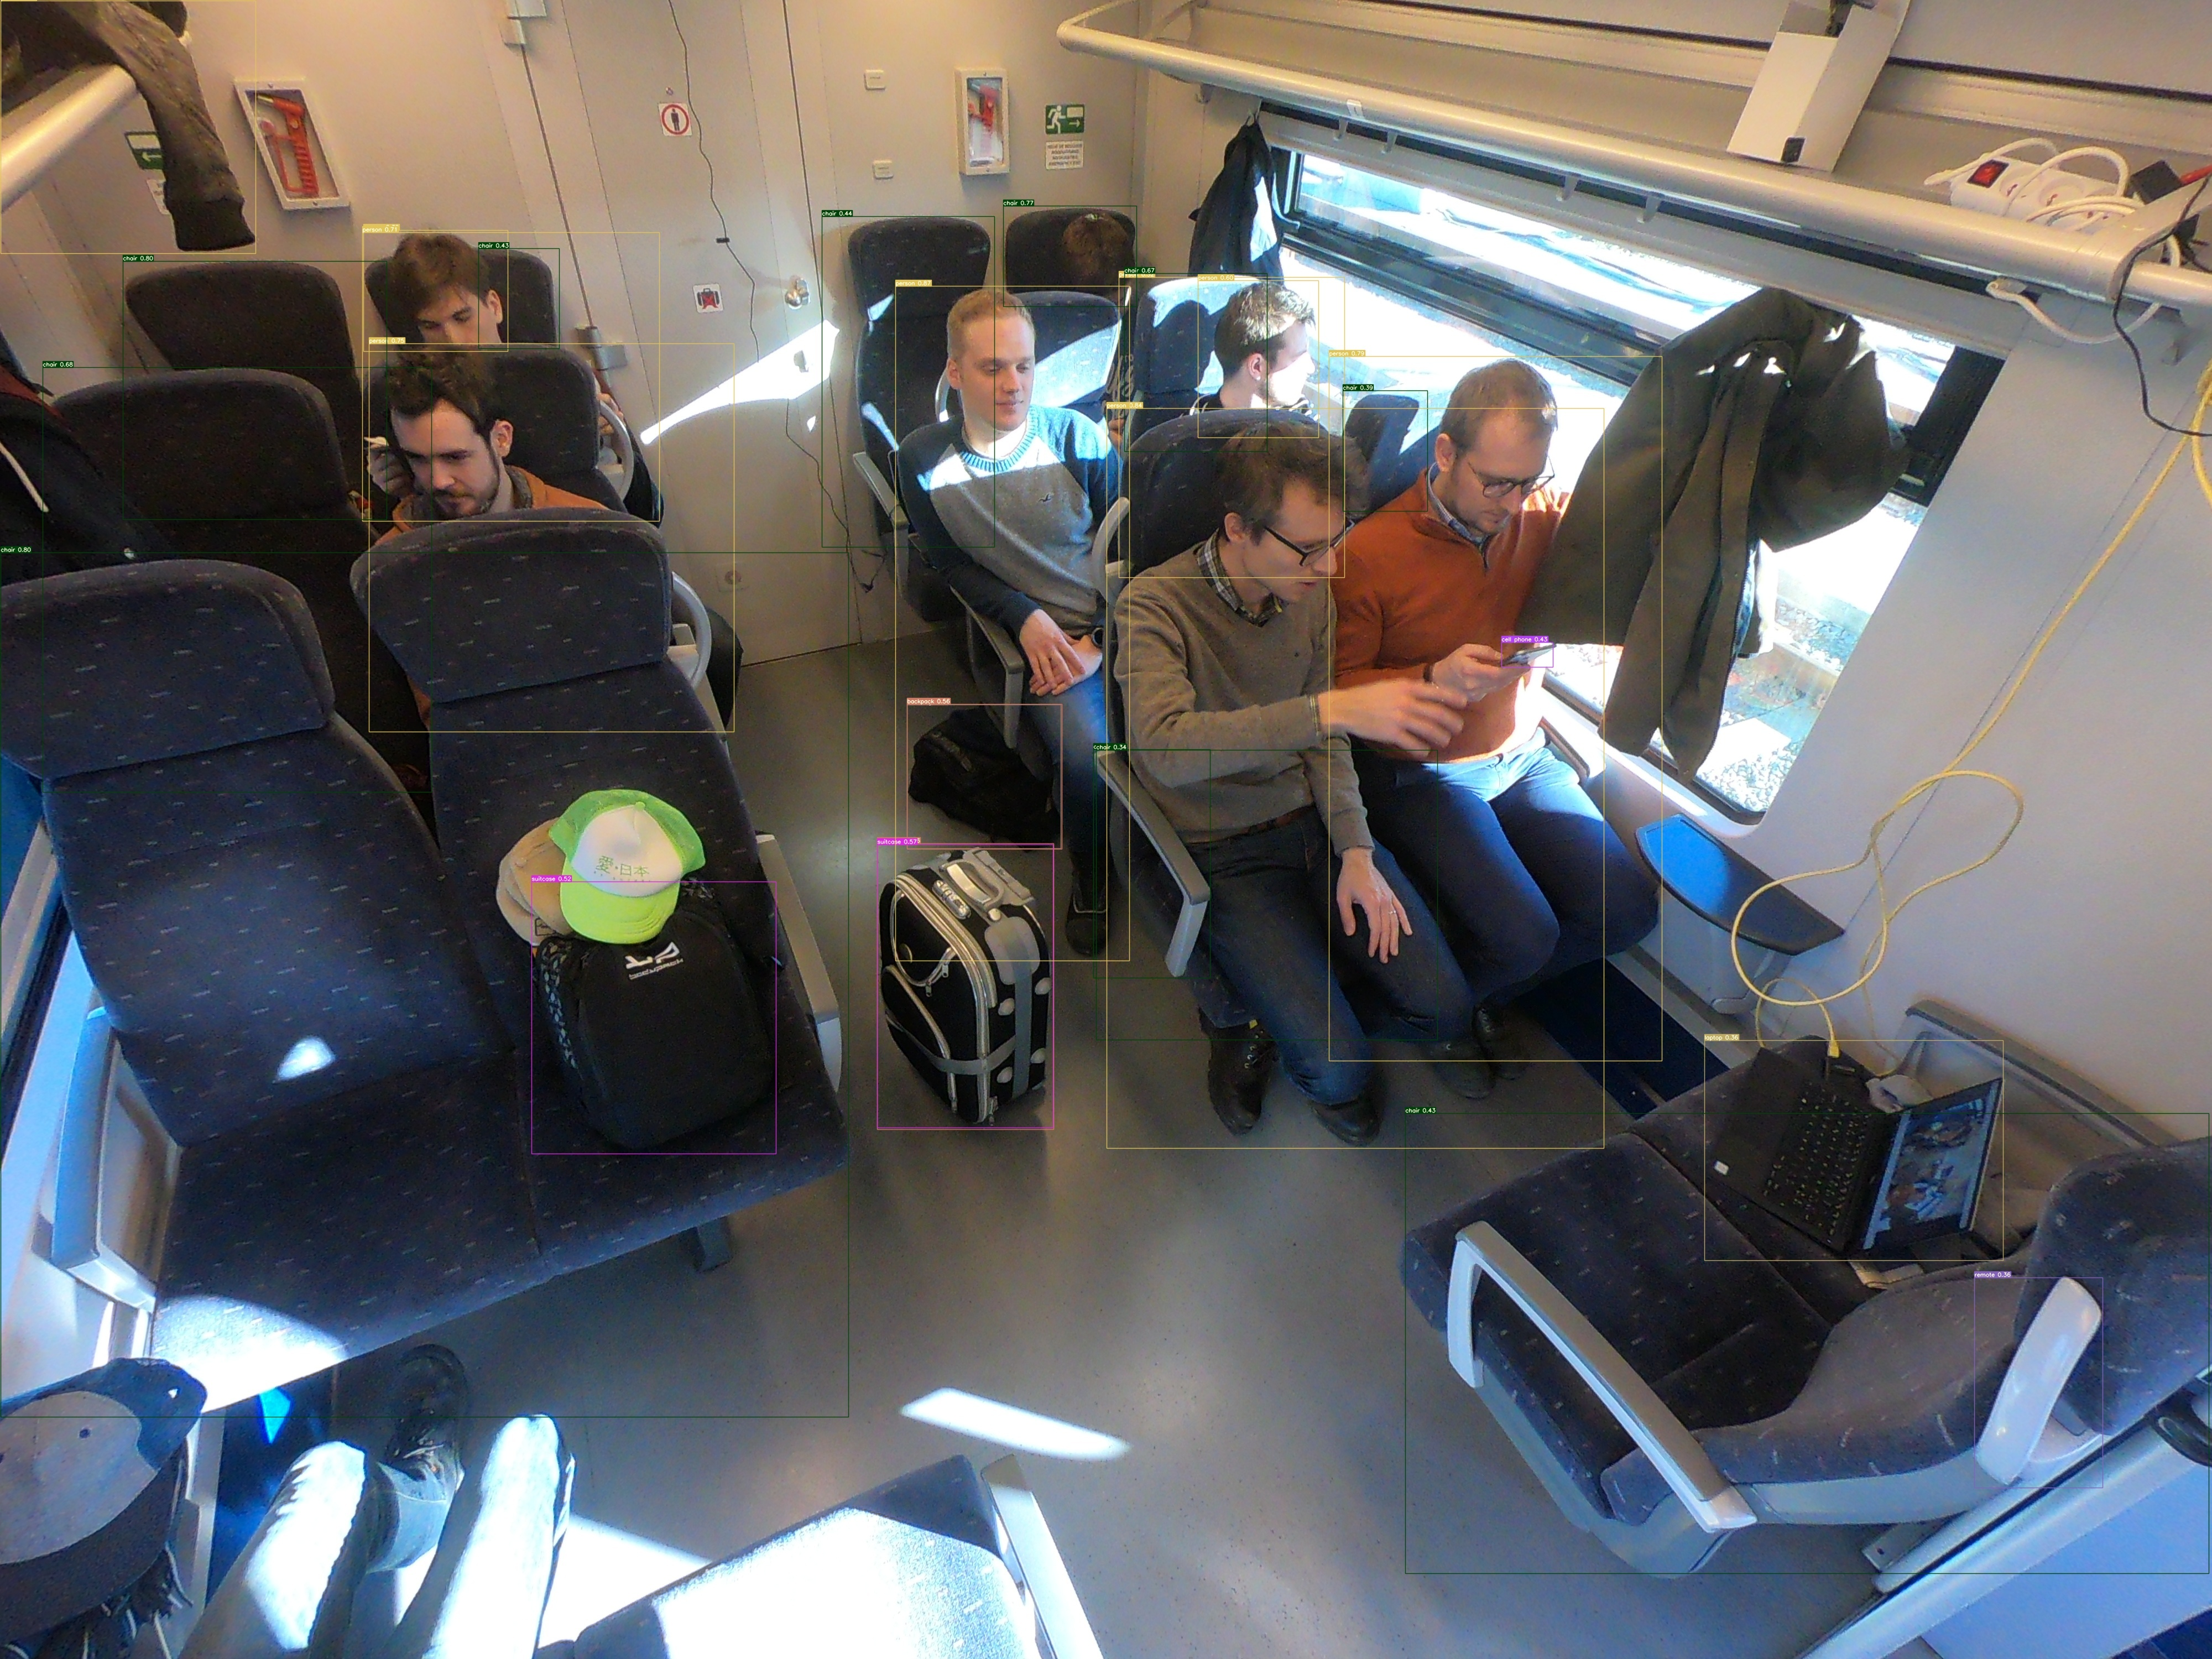

In [10]:
annoted_image = os.path.join(MODEL_FOLDER, 'yolov7', 'runs', 'detect', 'exp', 'GOPR0633.JPG')
print(annoted_image)
assert os.path.exists(annoted_image)

display_handle = display(None, display_id=True)
img = cv.imread(annoted_image, cv.IMREAD_ANYCOLOR)
_, img = cv.imencode('.jpeg', img)
display_handle.update(Image(data=img.tobytes()))

## SSD

## R-CNN

# Working with videos


In [8]:
test_video = os.path.join(VIDEO_FOLDER, os.listdir(VIDEO_FOLDER)[0])
assert os.path.exists(test_video)

Let's first try to play the video.

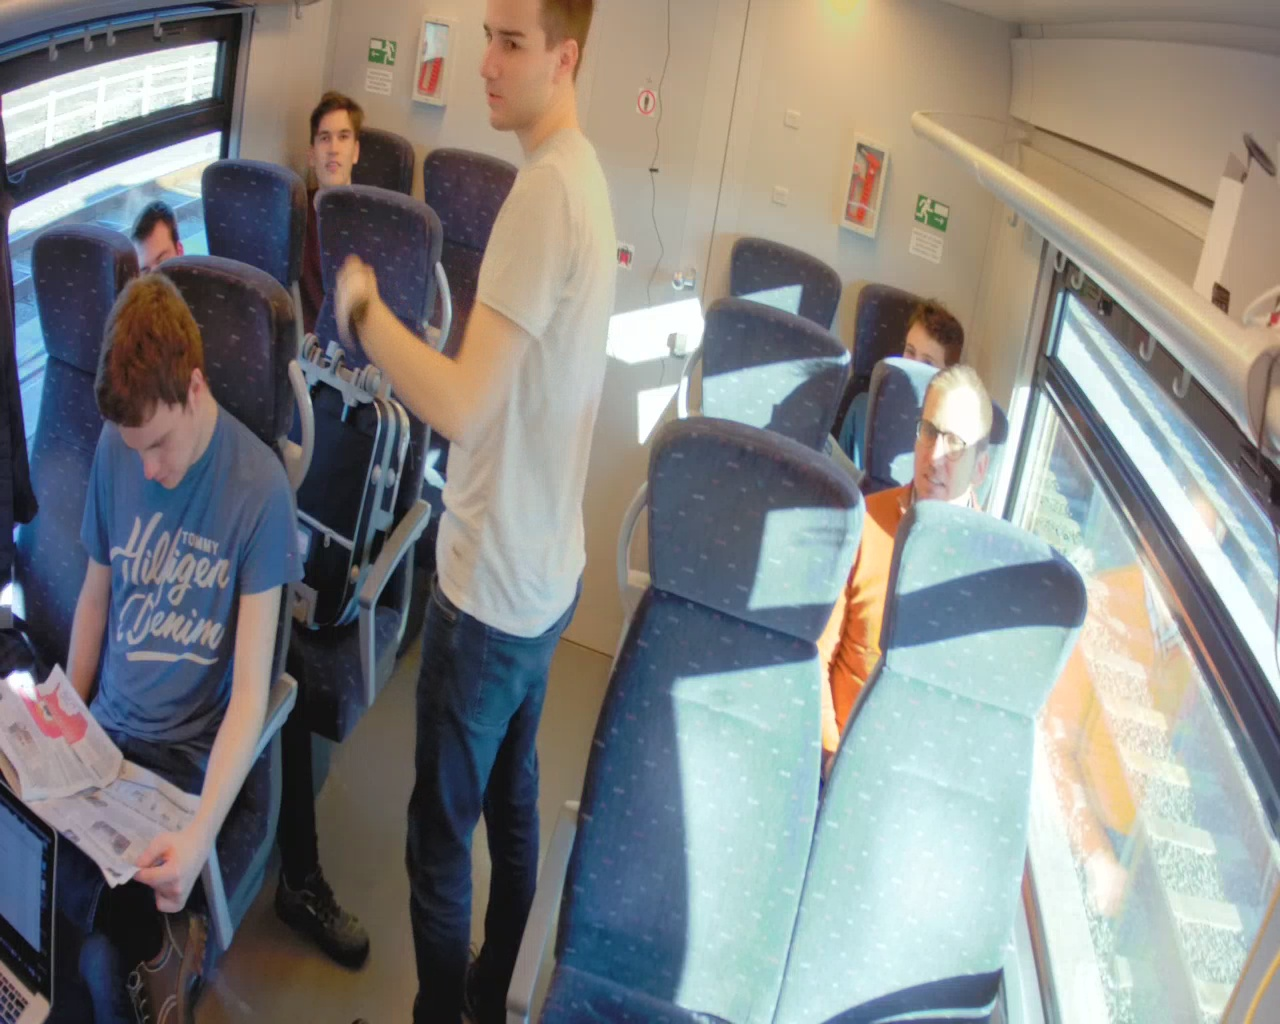

In [15]:
video = cv.VideoCapture(test_video)
display_handle = display(None, display_id=True)
try:
    can_read, frame = video.read()
    while can_read:
        _, frame = cv.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        can_read, frame = video.read()
except KeyboardInterrupt:
    pass
finally:
    video.release()